# **Machine Learning Para Teste de Personalidade**

* Integrantes do Grupo
  - Carlos Victor Prazeres Farias (04113719)
  - Cezar Augusto Holanda Mutran Filho (04111710)
  - Douglas Moura de Oliveira (04112935)
  - Giuliana Ferreira Toppino (04110782)
  - Giulio Ferreira Toppino (04110781)
  - Rikelvin Carmo do Espirito Santo (04113893)

# **Introdução**

Neste trabalho, vamos utilizar métodos de machine learning para prever o grupo de personalidade de pessoas de acordo com as respostas que serão dadas as perguntas realizadas. É um teste com perguntas que englobam características especificas, e de acordo com a resposta do usuário, as quais podem ser dadas em valores numéricos (de 1-5), sendo 1= Não concorda, 3= Neutro e 5= Concorda Totalmente. O programa irá definir um grupo de personalidade pro cliente, os quais podem ser:
- Extroversão (extrovertido/enérgico vs. solitário/reservado)
- Neuroticismo (sensível/nervoso vs. seguro/confiante)
- Agradabilidade (amigável/compassivo vs. desafiador/desapegado)
- Conscienciosidade (eficiente/organizado vs. descontraído/descuidado)
- Abertura a Experiências (inventivo/curioso vs. consistente/cauteloso)



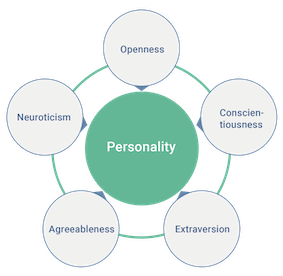




As ferramentas que iremos usar neste projeto são:
- Numpy
- Pandas
- Matplotlib
- Seaborn
- os
- KMeans
- KElbowVisualizer
- PCA
- Gradio **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import open
pd.options.display.max_columns = 150

In [2]:
data = pd.read_csv('data-final.csv', sep='\t')

- Visualização inicial do dataset 'data-final.csv' (Visão crua)

In [3]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,9419.0,5491.0,3959.0,4821.0,5611.0,2756.0,2388.0,2113.0,5900.0,4110.0,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,7235.0,3598.0,3315.0,2564.0,2976.0,3050.0,4787.0,3228.0,3465.0,3309.0,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,4657.0,3549.0,2543.0,3335.0,5847.0,2540.0,4922.0,3142.0,14621.0,2191.0,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,3996.0,2896.0,5096.0,4240.0,5168.0,5456.0,4360.0,4496.0,5240.0,4000.0,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,6004.0,3965.0,2721.0,3706.0,2968.0,2426.0,7339.0,3302.0,16819.0,3731.0,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


# **Início do tratamento de dados**

- Remove colunas desnecessárias

In [4]:
data.drop(data.columns[50:110], axis=1, inplace=True)

In [5]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


- Aplicando Estatísticas da base de dados com o método 'describe' do pandas

In [6]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,3.00,4.00,2.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,5.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


- Verificando a contagem de registros por valor

In [7]:
data["EXT3"].value_counts()

EXT3
4.00    284124
3.00    269135
2.00    191723
5.00    185771
1.00     76730
0.00      6075
Name: count, dtype: int64

- Selecionando o total de registros com o valor zero

In [8]:
data[(data == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- Limpando o Dataframe com apenas registros maiores que zero

In [9]:
data = data[(data > 0.00).all(axis=1)]

In [10]:
data["EXT1"].value_counts()

EXT1
3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: count, dtype: int64

## **Análise das Respostas do Dataset**

- **Salvando as questões do dataset em dicts**

In [11]:
ext_perguntas = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_perguntas = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_perguntas = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_perguntas = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_perguntas = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [12]:
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

- **Configuração do Plot dos Gráficos**

In [13]:
def vis_perguntas(caracteristica, perguntas, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[caracteristica[i-1]], bins=14, color= color, alpha=.5)
        plt.title(perguntas[caracteristica[i-1]], fontsize=18)

- **Gráfico da Personalidade Extroversão**

Q&As Relacionadas a Personalidade Extroversão


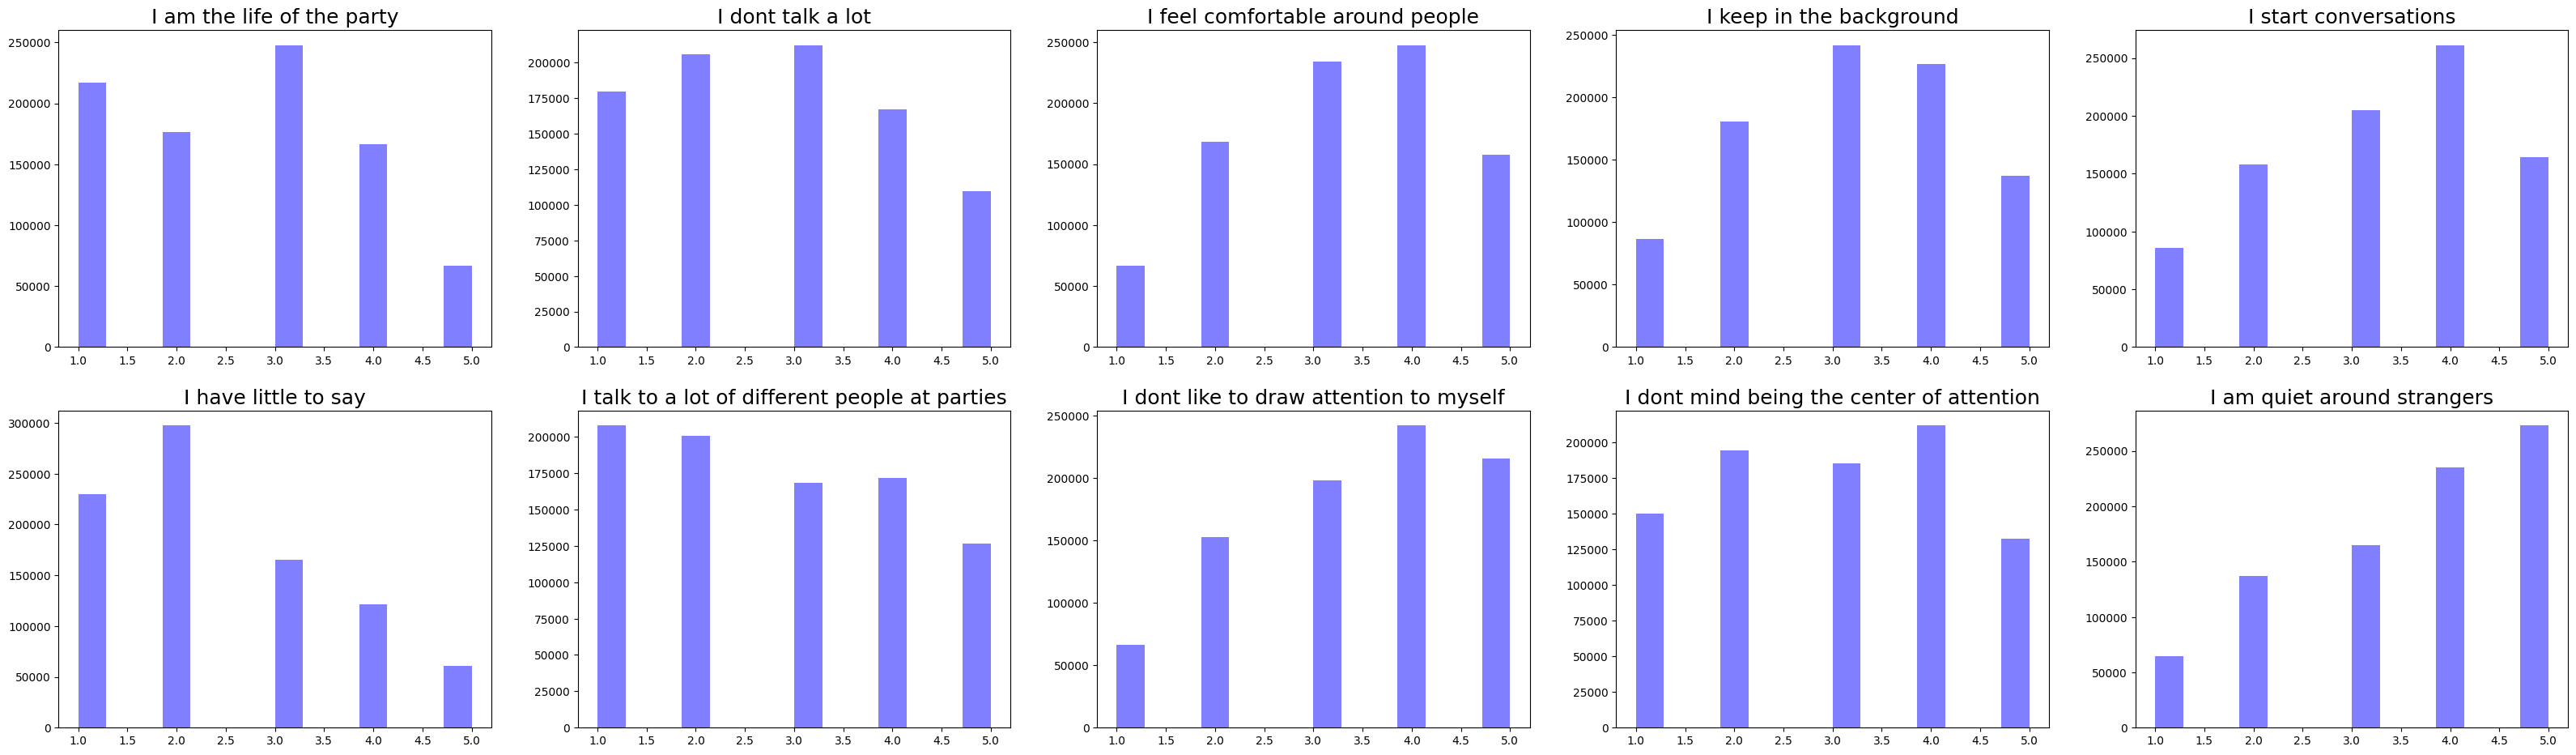

In [14]:
print('Q&As Relacionadas a Personalidade Extroversão')
vis_perguntas(EXT, ext_perguntas, 'blue')

- **Gráfico da Personalidade Neuroticismo**

Q&As Relacionadas a Personalidade Neuroticismo


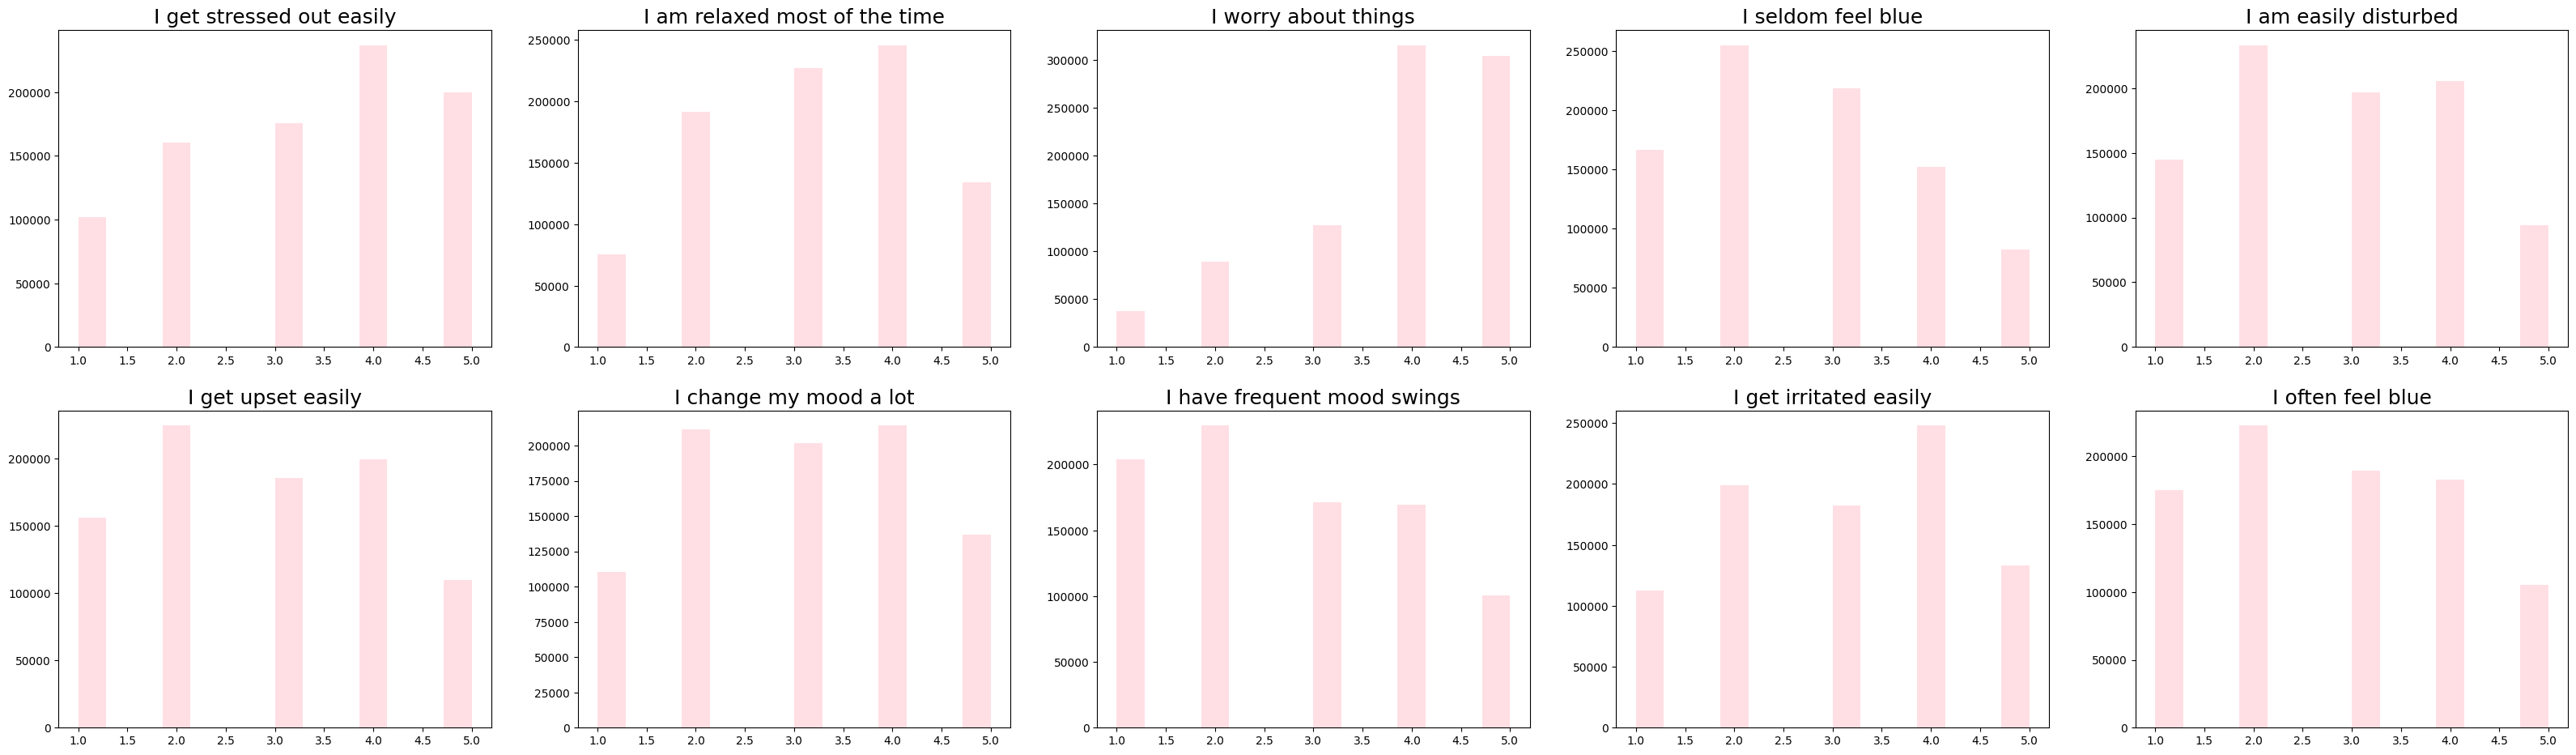

In [15]:
print('Q&As Relacionadas a Personalidade Neuroticismo')
vis_perguntas(EST, est_perguntas, 'pink')

- **Gráfico da Personalidade Agradabilidade**

Q&As Relacionadas a Personalidade Agradabilidade


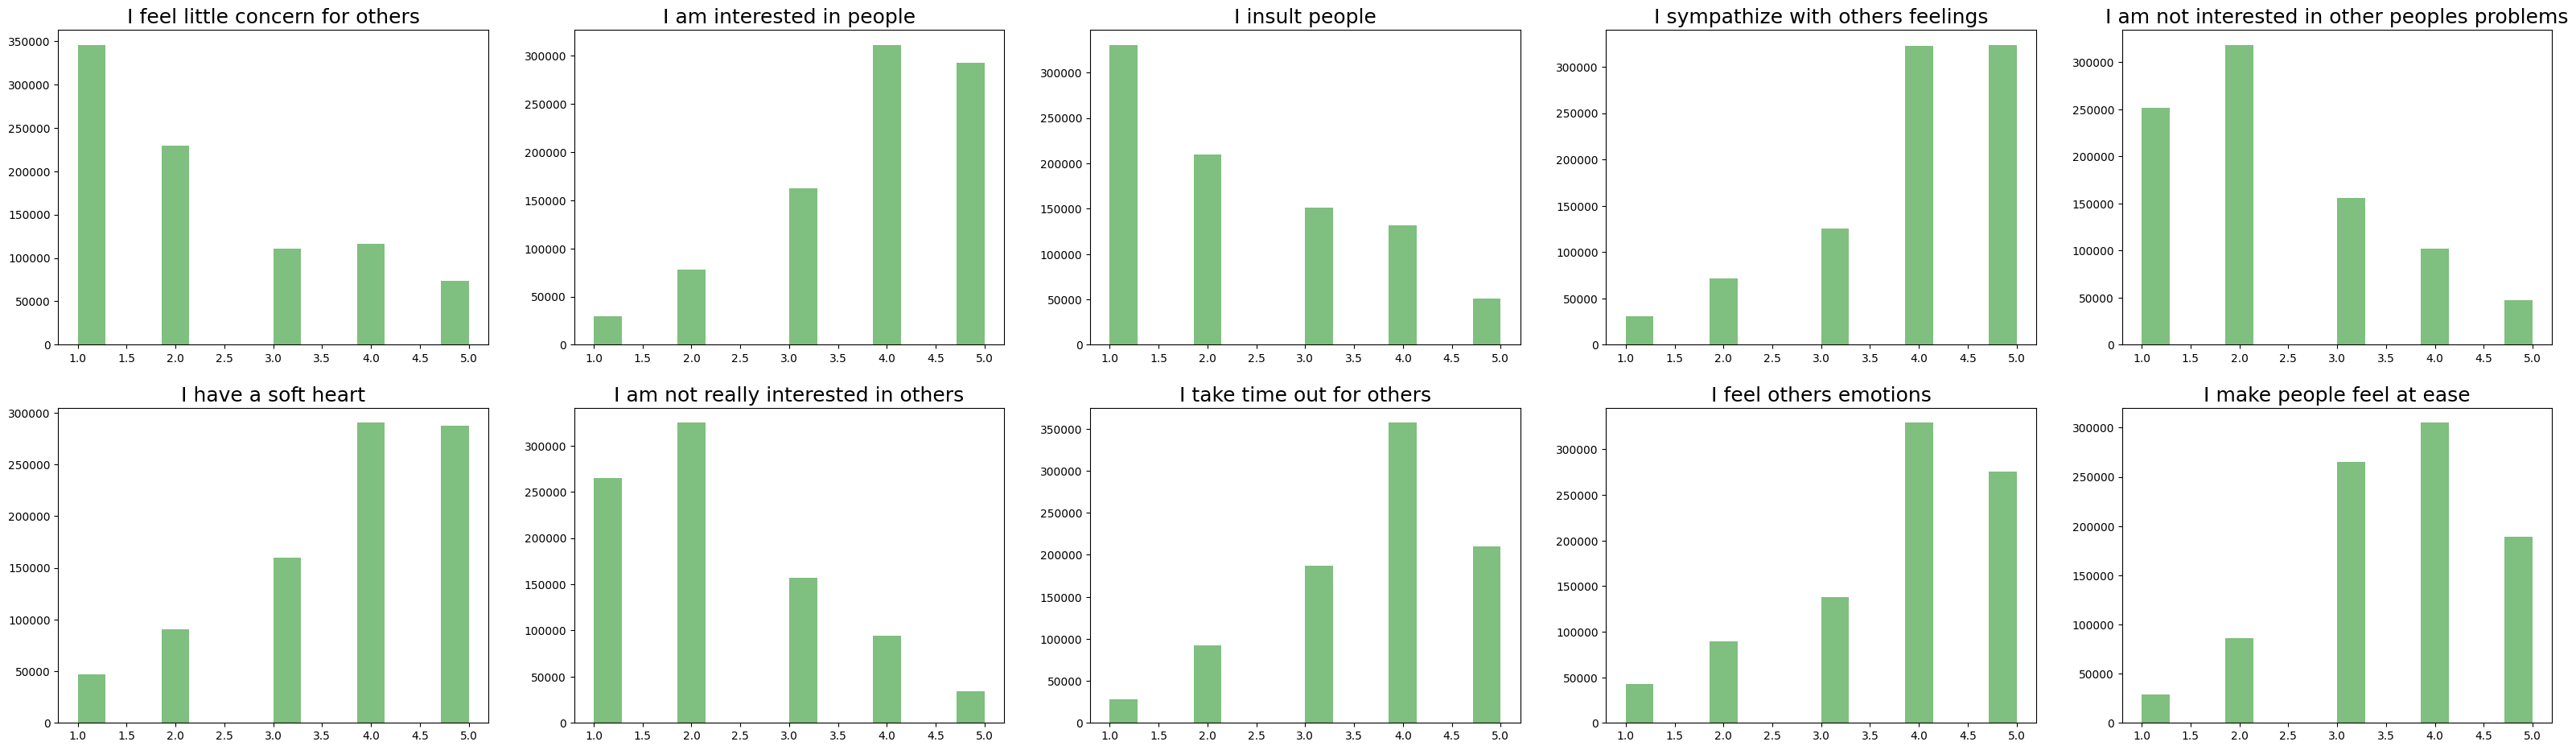

In [16]:
print('Q&As Relacionadas a Personalidade Agradabilidade')
vis_perguntas(AGR, agr_perguntas, 'green')

- **Gráfico da Personalidade Conscienciosidade**

Q&As Relacionadas a Personalidade Conscienciosidade


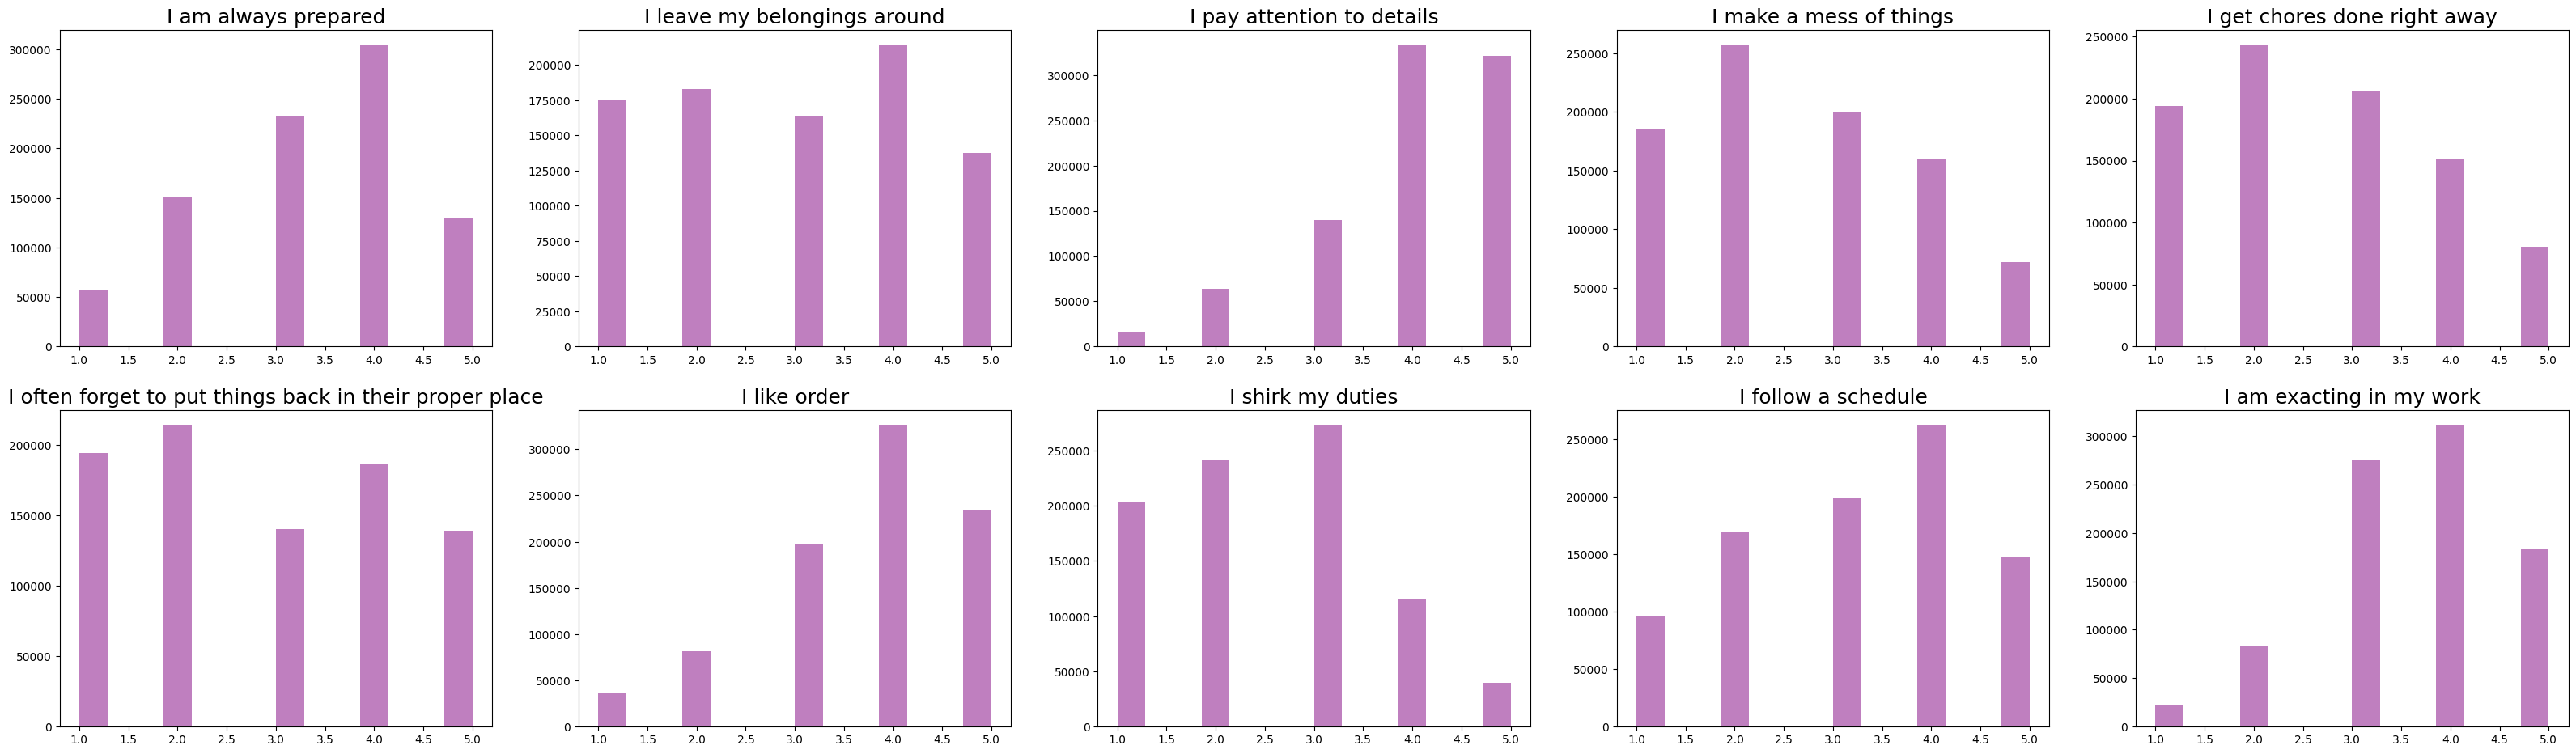

In [17]:
print('Q&As Relacionadas a Personalidade Conscienciosidade')
vis_perguntas(CSN, csn_perguntas, 'purple')

- **Gráfico da Personalidade Abertura a Experiências**

Q&As Relacionadas a Personalidade Abertura a Experiências


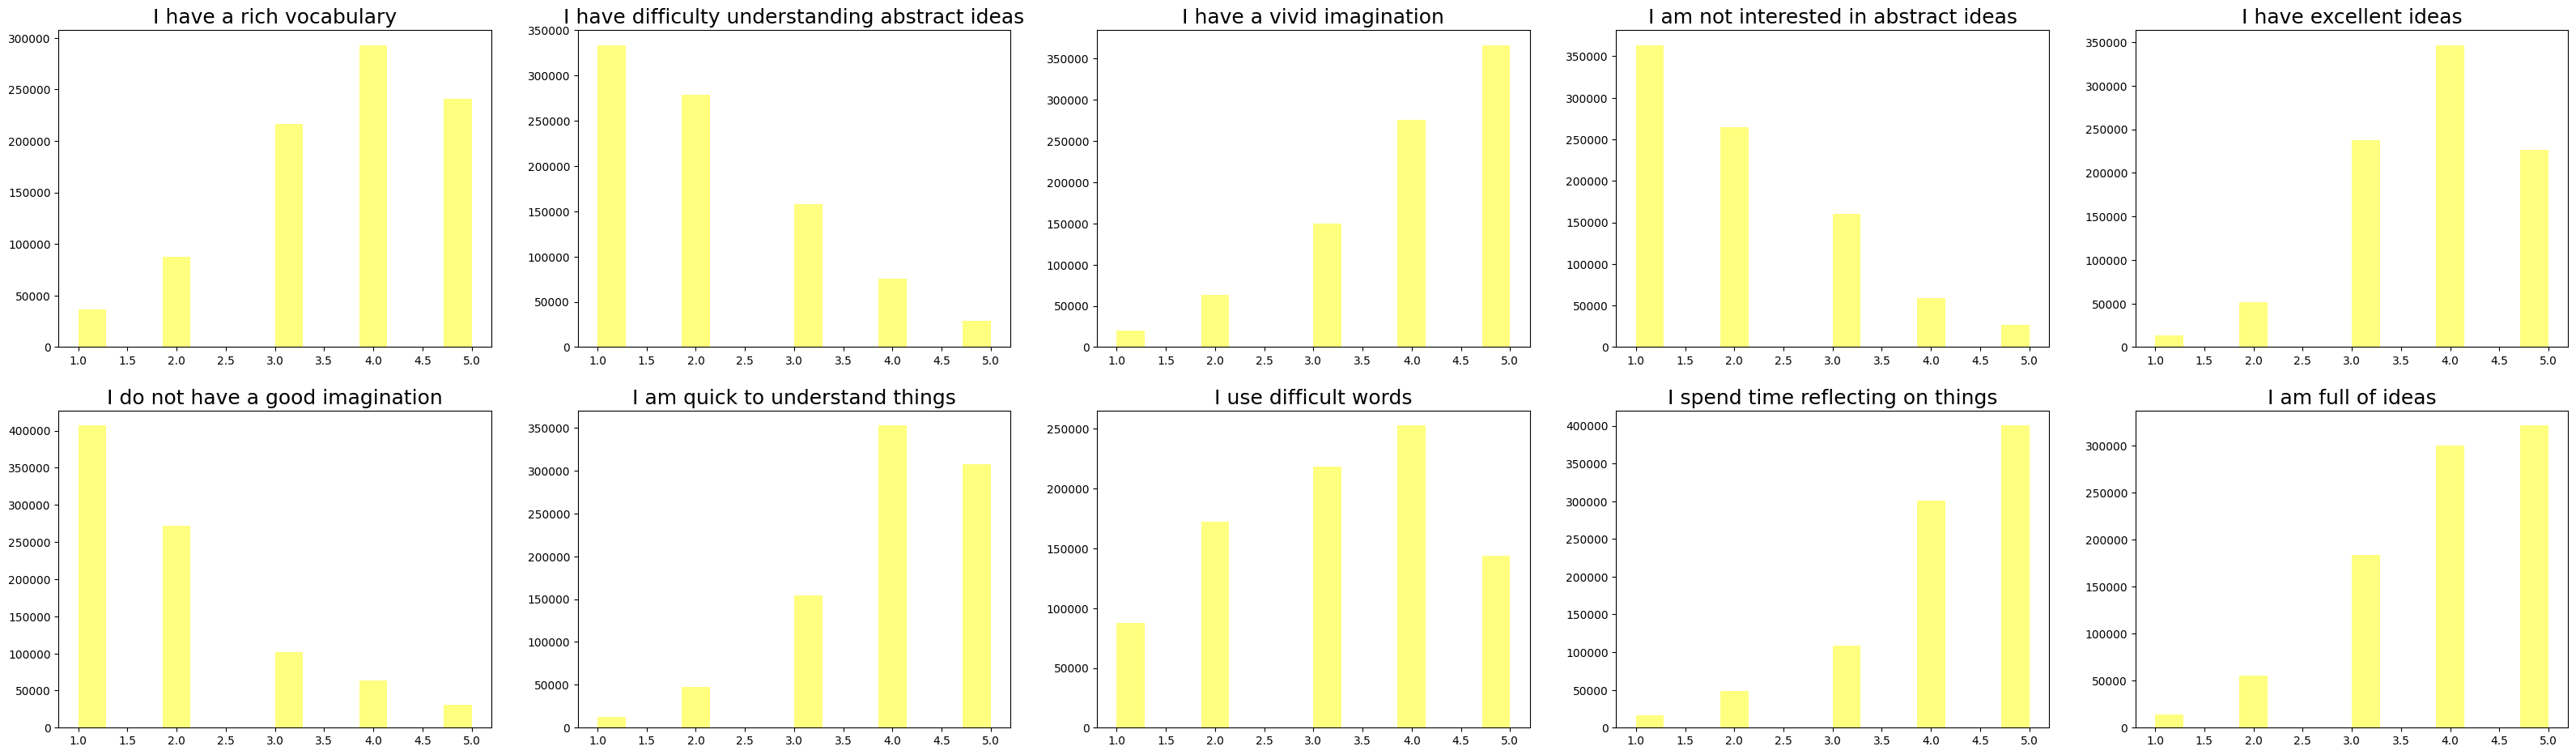

In [18]:
print('Q&As Relacionadas a Personalidade Abertura a Experiências')
vis_perguntas(OPN, opn_perguntas, 'yellow')

# **Definição do Uso de Clusters**

- Qual o numero de Clusters que vamos definir?

- Para sanar essa dúvida, devemos instalar a yellowbrick para uso do KMeans
- Esse é um algoritmo de agrupamento e não supervisionado

- **Regra de Negócio:**

  - Objetivo de separar pessoas com características de personalidade similares a partir dos 5 traços diferentes disponibilizados nesse dataset

In [19]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/282.6 kB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 92.2/282.6 kB 1.1 MB/s eta 0:00:01
   ----------------- ---------------------- 122.9/282.6 kB 1.0 MB/s eta 0:00:01
   ------------------------ --------------- 174.1/282.6 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/282.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

- Instanciando o método KMeans e o Visualizer

In [21]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

- Selecionando uma amostra aleatoria dos dados com 5000 observações, evitando o uso completo do dataset, o qual tem aproximadamente mais de 1 milhão de registros

In [22]:
data_sample = data.sample(n=5000, random_state=1)

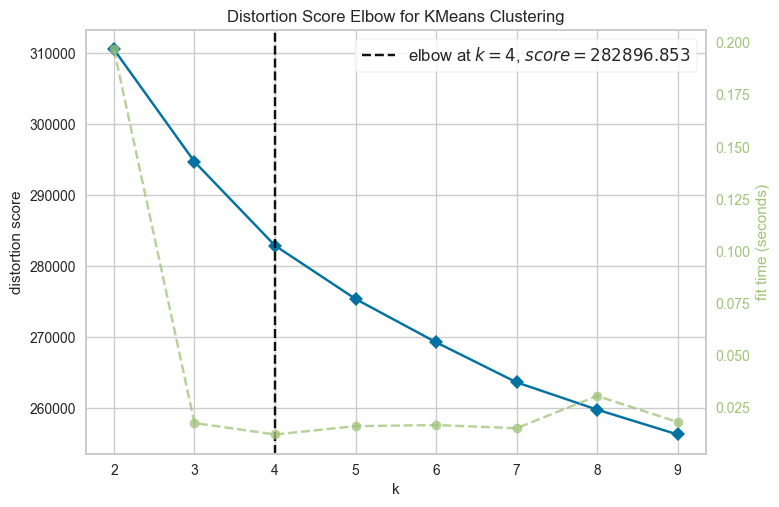

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
visualizer.fit(data_sample)
visualizer.poof()

- Como é possivel observar após esse teste, o número ideal de uso de clusters são 5 clusters como está explícito no grafico por meio do uso do KElbowVisualizer.

  - image.png

In [24]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

- Inserindo os rotulos dos clusters no dataframe (tabela)

In [25]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

- Verificando os dados já com a presença da tabela 'clusters'

In [26]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,2
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,1
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,1
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,2


# **Analisando os Grupos**
  - Qual a quantidade de observações em cada grupo?

In [27]:
data["Clusters"].value_counts()

Clusters
0    192781
2    183263
1    180320
4    169185
3    148885
Name: count, dtype: int64

- Agrupando os registros por grupos

In [28]:
data.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.46,1.91,3.81,2.49,4.06,1.82,3.67,2.75,3.79,2.99,3.81,2.96,4.24,2.42,3.27,3.47,3.80,3.45,3.64,3.18,2.14,4.30,2.66,4.19,2.00,4.01,1.86,3.91,4.13,3.86,2.97,3.64,3.85,3.25,2.21,3.54,3.46,2.84,2.93,3.49,3.79,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.22
1,2.15,3.27,3.11,3.64,3.00,2.69,2.24,3.99,2.33,4.12,3.60,3.03,4.21,2.59,2.88,2.88,2.94,2.50,3.04,2.76,1.85,3.98,1.69,4.39,1.96,4.20,1.99,4.01,4.20,3.73,3.86,2.21,4.30,2.03,3.26,2.06,4.19,2.02,3.86,3.90,3.56,2.17,3.89,2.08,3.71,1.99,4.00,2.97,4.27,3.79
2,3.46,1.96,4.33,2.24,4.27,1.68,3.87,2.82,3.74,2.53,2.32,3.85,3.15,3.32,2.11,1.90,2.10,1.67,2.11,1.72,1.89,4.45,1.84,4.25,1.87,3.86,1.60,4.10,4.09,4.20,3.75,2.58,4.20,1.90,3.14,2.27,3.88,1.94,3.59,3.89,3.91,1.75,4.09,1.79,4.16,1.66,4.33,3.25,4.11,4.29
3,2.15,3.45,2.81,3.59,2.62,2.87,2.12,3.72,2.69,3.99,2.42,3.74,3.13,3.01,2.38,2.08,2.37,1.98,2.67,2.36,3.05,3.03,2.63,2.91,3.24,2.79,3.10,2.98,2.73,3.09,3.29,2.91,3.84,2.46,2.45,2.81,3.56,2.57,2.90,3.52,3.73,1.95,3.79,2.05,3.79,2.05,4.09,3.30,3.92,3.84
4,1.81,3.64,2.23,4.06,2.29,3.19,1.74,4.08,2.18,4.49,4.28,2.46,4.52,2.13,3.57,3.89,4.00,3.78,4.01,3.96,2.47,3.37,2.60,3.83,2.57,3.86,2.72,3.43,3.66,3.05,2.81,3.39,3.81,3.51,2.07,3.52,3.56,3.07,2.76,3.31,3.52,2.38,4.07,2.13,3.43,2.09,3.69,3.19,4.29,3.72


- Calculando a média de cada grupo de questões para verificar um padrão

  - Selecionando as colunas de cada grupo

In [29]:
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

- Somando os valores de cada grupo

In [30]:
data_soma = pd.DataFrame()
data_soma['extroversão'] = data[ext].sum(axis=1)/10
data_soma['neuroticismo'] = data[est].sum(axis=1)/10
data_soma['agradabilidade'] = data[agr].sum(axis=1)/10
data_soma['conscienciosidade'] = data[csn].sum(axis=1)/10
data_soma['abertura a experiências'] = data[opn].sum(axis=1)/10
data_soma['clusters'] = predicoes

- Exibindo o valor médio por grupo

In [31]:
data_soma.groupby('clusters').mean()

,extroversão,neuroticismo,agradabilidade,conscienciosidade,abertura a experiências
clusters,,,,,
0,3.07,3.42,3.31,3.22,3.37
1,3.05,3.04,3.20,3.17,3.24
2,3.09,2.43,3.21,3.11,3.33
3,3.00,2.61,2.95,3.03,3.25
4,2.97,3.66,3.16,3.18,3.25


- Visualizando as médias por grupo

In [32]:
data_clusters = data_soma.groupby('clusters').mean()

# **Uso de plots**

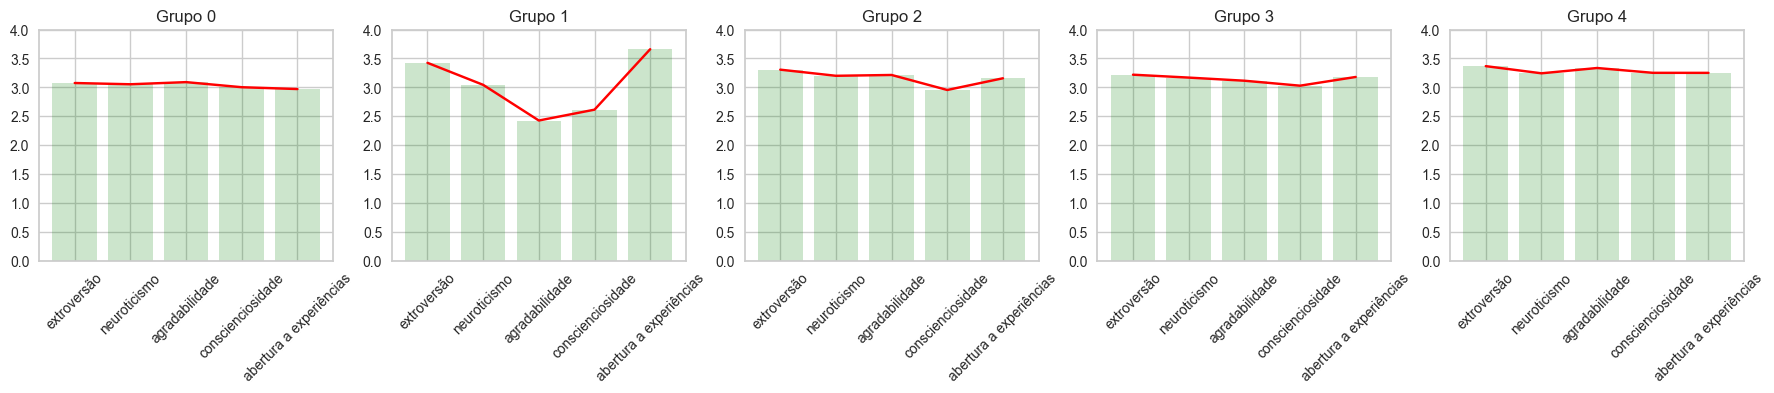

In [33]:
plt.figure(figsize=[22,3])
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
  plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
  plt.title('Grupo ' + str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4);

- Nesses plots, cada grupo representa um cluster, sendo uma média entre os dados que estão neles respectivamente, e só para lembrar que está sendo usado apenas um 'sample' de 5000 casos diferentes, sendo que o dataset por completo tem aproximadamente 1 milhão de casos distintos.

# **PCA - Redução de Dimensionalidade**

- **O PCA é uma técnica estabelecida de aprendizado de máquina.**

- **Ele trabalha analisando dados que contêm muitas variáveis**

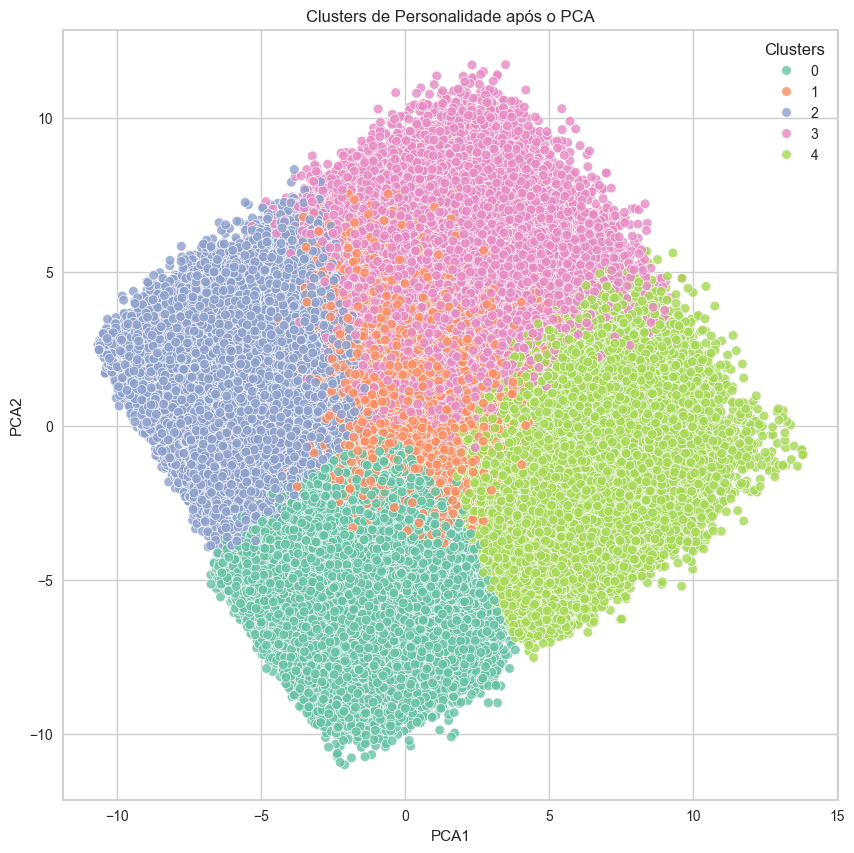

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predicoes
df_pca.head()

plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Clusters de Personalidade após o PCA');

- **Criando uma planilha para entrar com os dados**

In [37]:
data[:0].to_excel("perguntas.xlsx", index=False)

- **Recuperando os dados da planilha**

In [38]:
meus_dados = pd.read_excel('resp_teste_1.xlsx')

- **Passando minha planilha para o modelo**

In [39]:
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é:', grupo_personalidade )

Meu grupo de personalidade é: 4


- **Definindo o grupo de personalidade do usuário de acordo com as respostas que estão na planilha**

In [40]:
col_list = list(meus_dados)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

resultados = pd.DataFrame()
resultados['extroversão'] = meus_dados[ext].sum(axis=1)/10
resultados['neuroticismo'] = meus_dados[est].sum(axis=1)/10
resultados['agradabilidade'] = meus_dados[agr].sum(axis=1)/10
resultados['conscienciosidade'] = meus_dados[csn].sum(axis=1)/10
resultados['abertura a experiências'] = meus_dados[opn].sum(axis=1)/10
resultados['cluster'] = grupo_personalidade
print('Soma dos resultados das minhas respostas')
resultados

Soma dos resultados das minhas respostas


,extroversão,neuroticismo,agradabilidade,conscienciosidade,abertura a experiências,cluster
0,3.30,3.10,3.10,3.00,2.50,4


- **Resultados em gráfico das respostas**

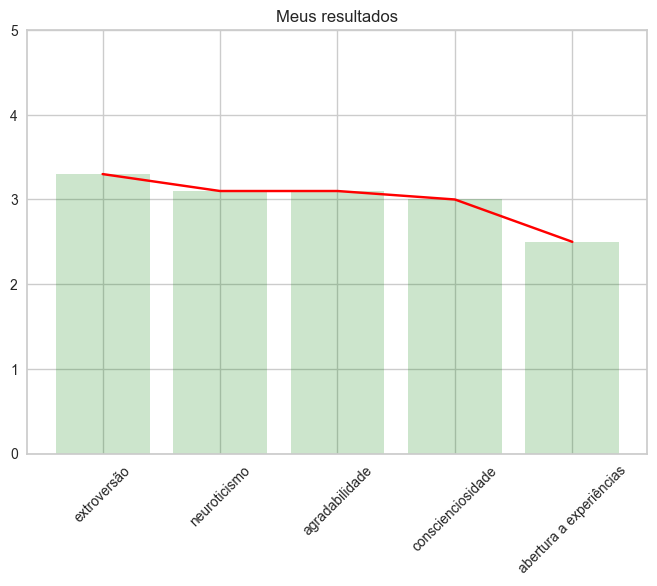

In [41]:
resultados= resultados.drop('cluster', axis=1)
plt.bar(resultados.columns, resultados.iloc[0,:], color='green', alpha=0.2)
plt.plot(resultados.columns, resultados.iloc[0,:], color='red')
plt.title('Meus resultados')
plt.xticks(rotation=45)
plt.ylim(0,5);

# **Gerando Interface Para o Usuário**

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.9 MB/s e

In [ ]:
import gradio as gr

Essa ferramenta gera uma interface no próprio jupyter notebook e/ou na web

Lendo os dados com as questões

In [ ]:
dicio_questions = open("questions.txt").read().split("\n")

Verificando os dados

In [ ]:
dicio_questions

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.\t',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'CSN1\tI am always prepared.',
 'CSN2\tI leave my belongings around.',
 'CSN3\tI pay attention to details.',
 'CSN4\tI make a mess of things.',
 'CSN5\tI get chores done right away.',
 'OPN1\tI have a rich vocabulary.',
 'OPN2\tI have difficulty understanding abstract ideas.',
 'OPN3\tI have a vivid imagination.',
 'OPN4\tI am not interested in abstract ideas.',
 'OPN5\tI have excellent ideas.',
 '']

Limpando os dados e recuperando apenas as questões

In [ ]:
questions = []
for q in dicio_questions:
  q = str(q)
  questions.append(q[q.find("\t"):].lstrip())

In [ ]:
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.\t',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I am always prepared.',
 'I leave my belongings around.',
 'I pay attention to details.',
 'I make a mess of things.',
 'I get chores done right away.',
 'I have a rich vocabulary.',
 'I have difficulty understanding abstract ideas.',
 'I have a vivid imagination.',
 'I am not interested in abstract ideas.',
 'I have excellent ideas.',
 '']

Criando os inputs dinamicos para passar ao gradio

In [ ]:
inputs_questions = []
for q in questions:
  obj_input = gr.Slider(minimum=1, maximum=5, step=1)
  inputs_questions.append(obj_input)

O metodo de uso do input escolhido foi o Slider que é uma forma de interface, sendo que existem varias outras na documentação do gradio

Verificando os inputs

In [ ]:
inputs_questions

Criando a interface e a função predict

In [ ]:
def predict(*outputs_questions):
  outputs_questions = np.array(outputs_questions).reshape(1,-1)
  return k_fit.predict(outputs_questions)

demo = gr.Interface(
                    fn = predict,
                    title = "As Cinco Personalidades",
                    description = "Sistema para detecção de traços de personalidade.",
                    inputs = inputs_questions,
                    outputs = "text")

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5043ccb7e3e2a0bc76.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
